<a href="https://colab.research.google.com/github/medha-sagar/OCR/blob/master/Optical_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
!pip install pytesseract

In [0]:
import pytesseract
import shutil
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
try:
 from PIL import Image
except ImportError:
 import Image

In [0]:
img = cv2.imread('cancer2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.bitwise_not(gray)

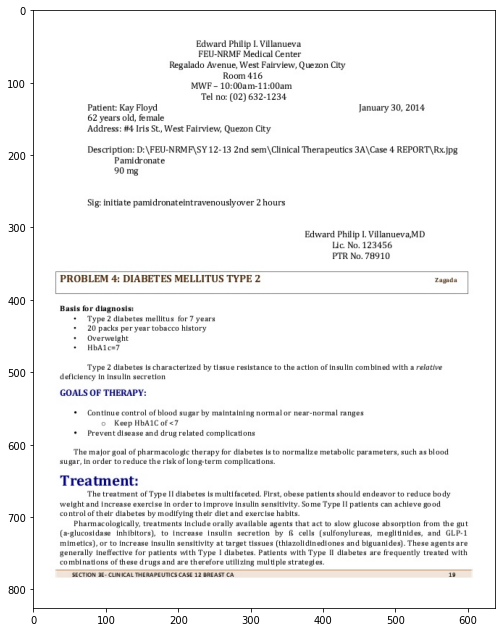

In [22]:
plt.figure(figsize=(9,11))
plt.imshow(img)
plt.show()

In [20]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:", out_below)

OUTPUT: Edward Philip I. Villanueva

FEU-NRMF Medical Center

Regalado Avenue, West Falrview, Quezon City
Room 416
MWF~10:00am-11:00am

Tel no: (02) 632-1234
Patient: Kay Floyd January 30, 2014
62 years old, female
‘Address: #4 Iris St, West Falrview, Quezon City

Description: D:\FEU-NRMF\SY 12-13 2nd sem\Clinical Therapeutics 3A\Case 4 REPORT\Rx.jpg,
Pamidronate
90 mg

Sig: initiate pamidronateintravenouslyover 2 hours

Edward Philip l. VilanuevaMD
Lic. No, 123456
PTR No. 78910

 

 

PROBLEM 4: DIABETES MELLITUS TYPE 2

 

 

 

Basls for diagnosis:
+ Type 2 diabetes mellitus for years
+ 20 packs per year tobacco history
+ Overweight
+ bale?

‘Type 2 dlabetes Is characterized by tasue resistance to the acton of Insulin combined with a relative
deflelency in Insulin secretion

GOALS OF THERAPY:

+ Continue control of blood sugar by maintaining normal or near-normal ranges
© Keep HbAIC of <7
+ Prevent disease and drug related complications

‘The major goal of pharmacologle therapy for 

In [0]:
import tempfile
from PIL import Image

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

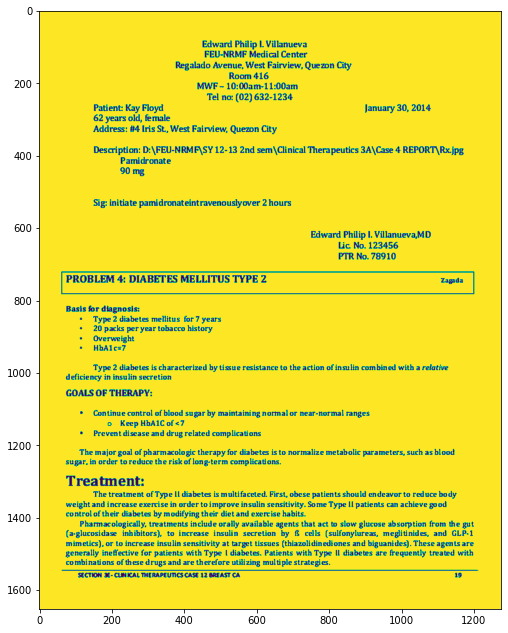

In [32]:
img = process_image_for_ocr('cancer2.jpg')
plt.figure(figsize=(9,11))
plt.imshow(img)
plt.show()


In [31]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:", out_below)

OUTPUT: Edward Philip I. Villanueva
FEU-NRMF Medical Center
Regalado Avenue, West Fairview, Quezon City
Room 416
MWF -~ 10:00am-11:00am

Tel no: (02) 632-1234
Patient: Kay Floyd January 30, 2014
62 years old, female
Address: #4 Iris St, West Fairview, Quezon City

Description: D:\FEU-NRMF\SY 12-13 2nd sem\Clinical Therapeutics 3A\Case 4 REPORT\Rx. jpg
Pamidronate

90 mg

Sig: initiate pamidronateintravenouslyover 2 hours

Edward Philip |. VillanuevaMD
Lic. No. 123456
PTR No. 78910

 

 

PROBLEM 4: DIABETES MELLITUS TYPE 2 Zagada

 

 

Bas!s for diagnosis:
+ Type 2 diabetes mellitus for 7 years
+ 20 packs per year tobacco history
+ Overweight
« HbAlc=7

Type 2 diabetes is characterized by tisstte resistance to the action of insulin combined with a relative
deficiency in insulin secretion

GOALS OF THERAPY:

* Continue control of blood sugar by maintaining normal or near-normal ranges
o Keep HbAIC of <7
* Prevent disease and drug related complications

The major goal of pharmacologic t